In [3]:
print ("Hola")

Hola


In [8]:
import numpy as np #Calculo numerico
import scipy as sc #Extiende numpy, en tratamiento de datos como imagenes
import matplotlib.pyplot as plt # Visualizacion grafica
#sklearn incluye ya modelos para probar

In [9]:
from sklearn.datasets import load_boston

In [11]:
#Cargando la libraria
boston= load_boston()

print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [17]:
#Para entender el siguiente comentario ve el resultado anterior
#Utilizando el numero medio de habitaciones, intetaremos predecir el valor medio de la vivienda
#en otras palabras usando RM, predeciremos MEDV
X = boston.data[:,5] #Todas las filas de la columna 5 (RM)
Y = boston.target #Esta contiene todos los valores de (MEDV)
print (len(X),len(Y))


506 506


Formula para minimizar el error cuadratico medio (MCO): $\beta=(X^{T}X)^{-1}X^{T}Y$

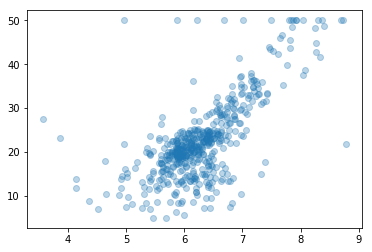

In [49]:
#Graficando la relacion entre ambos valores
#Convirtiendo los datos en matrices de numpy
X1 = np.array(X) 
Y1 = np.array(Y)

plt.scatter(X1, Y1, alpha=0.3) #El alpha es para veren transparencia los puntos, asi se ve donde estan mas concentrados
plt.show()

In [50]:
print (X1.shape)
print (Y1.shape)

(506,)
(506,)


In [41]:
#Agregando una columna de 1s para termino independiente
#Adicionalmente se aplica la transpuesta para preparar la matriz para usarla en la formula
X1 = np.array([np.ones(len(X1)), X1]).T

In [42]:
#Escribiendo la formula
#Multiplicacion Matricial es el operador @
#Esta matriz contiene los parametros que minimizan el error cuadratico medio de la nube de puntos
B= np.linalg.inv(X1.T @ X1) @ X1.T @ Y1

In [43]:
B

array([-34.67062078,   9.10210898])

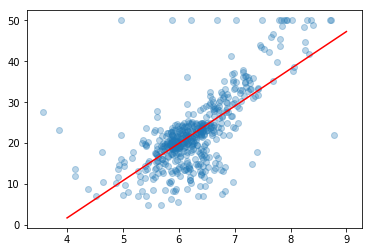

In [54]:
#Tenemos un par de valores, 1 elemento independiente  y 2 la pendiente de la linea
#B[0] = -34.67062078 representa el punto en el eje Y cuando X=0
#B[1] = 9.10210898 representa el incremento de Y por cada unidad de X

#Para graficar se especifica
#La lina empezara en el punto 4,9 y 
#los puntos del eje Y seran los de la ecuacion lineal
plt.scatter(X1, Y1, alpha=0.3)
plt.plot([4,9],[B[0]+B[1]*4, B[0]+B[1]*9], c="red")
plt.show()